<a href="https://colab.research.google.com/github/sumithira153/Sumithira-/blob/main/OSFtask2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
#load our dataset
df = pd.read_csv("/content/spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#dataset summary
df.info

<bound method DataFrame.info of       Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3           4685  spam  Subject: photoshop , windows , office . cheap ...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
...          ...   ...                                                ...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   
5170        4807  spam  Subject: important online banking alert\r\ndea...   

      label_num  
0             0  
1      

In [ ]:
#sum of all na values
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
#rename the given dataset colunms
df.rename({"label":"SP_LABEL","text":"SP_TEXT_GI"},inplace=True,axis=1)
df.tail()

,Unnamed: 0,SP_LABEL,SP_TEXT_GI,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [ ]:
#applying label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['SP_LABEL']=le.fit_transform(df['SP_LABEL'])

In [ ]:
df.columns = ['unnamed:0','SP_LABEL', 'SP_TEXT_GI', 'label_num']

In [ ]:
df.head()

,unnamed:0,SP_LABEL,SP_TEXT_GI,label_num
0,605,0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,1,"Subject: photoshop , windows , office . cheap ...",1
4,2030,0,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.shape

(5171, 4)

In [ ]:
#declare variables X, y
X = df.loc[:, 'SP_TEXT_GI']
y =df.loc[:, 'label_num'].values

In [ ]:
X[1]

'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls'

In [ ]:
# array
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(X).toarray()

In [ ]:
X[1]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#spliting the data into train using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm1 = confusion_matrix(y_test, y_pred)

In [ ]:
print('Accuracy: ', accuracy_score(y_test, y_pred) * 1929)

Accuracy:  1848.2106958762888


<Axes: >

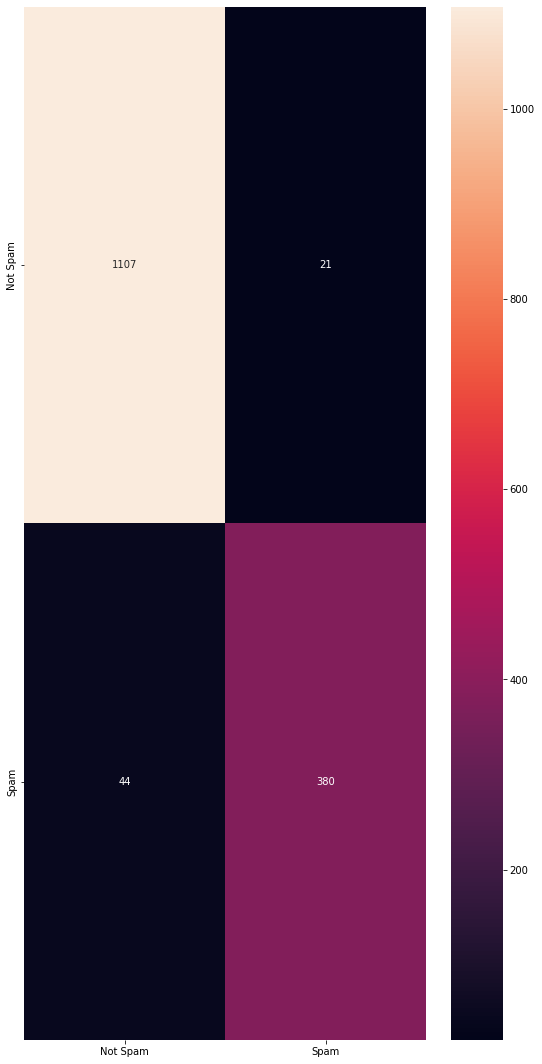

In [ ]:
# plot figures
import seaborn as sns
plt.figure(figsize = (9, 19))
sns.heatmap(cm1,annot = True, fmt="n", xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
cl=RandomForestClassifier()
cl.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = cl.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print('Accuracy: ', accuracy_score(y_test, y_pred) * 2002)

Accuracy:  1945.2422680412371
